
# An overview of PCA (from scratch)

Nr Obj: 12665
Im weight: 28
Im height: 28


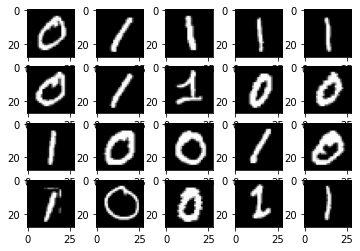

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Loading the dataset files into memory and analysing them
x_train = np.load('train-images-01.npy')
y_train = np.load('train-labels-01.npy')

x_test = np.load('test-images-01.npy')
y_test = np.load('test-labels-01.npy')

# Understand how many objects and features I have (P.S: we have a collection of
# images)
nobj = x_train.shape[0]
im_w = x_train.shape[1]
im_h = x_train.shape[2]
print("Nr Obj:", nobj)
print("Im width:", im_w)
print("Im height:", im_h)


# Draw the first 20 digits of the train dataset
rows = 4
columns = 5
fig = plt.figure()
ax = []
for i in range(columns*rows):
    # create subplot and append to ax
    ax.append(fig.add_subplot(rows, columns, i+1))
    plt.imshow(x_train[i], cmap='gray')

plt.show()

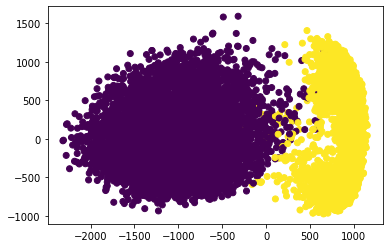

Classifier Accuracy: 99.62%


In [ ]:
# 2. Let us describe each image with a flatened representation of its pixels, 
# i.e. a two-dimensional matrix with 
# rows = objects, columns = w*h
# https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.reshape.html
X = np.reshape(x_train, (nobj,im_w*im_h))

# 3a. Calculate the mean of each feature and center the data
m = np.mean(X, axis=0)
Xc = X - m

# 3b. Calculate the covariance matrix of the centred data
C = np.cov(Xc, rowvar=False)  

# 3c. Calculate eigenvalues and eigenvectors of the covariance matrix
lambdas, U = np.linalg.eigh(C)

# 3d. Order the eigenvalues from largest to smallest
best_eig_idxs = np.argsort(lambdas)[::-1]
best_eig = lambdas[best_eig_idxs]
best_U = U[:,best_eig_idxs]


# 3e. I construct the transformation matrix T: 
# - By selecting the first two columns I can get the eigenvectors corresponding 
# to the 2 largest eigenvalues
T = best_U[:,:2]


# 4. Apply the transformation to the train data, make a scatter plot of the 
# transformed data. The transformation is performed via the inner product of the
#  transformation matrix T and the (centered) data matrix
XT = np.dot(Xc, T)
plt.scatter(XT[:,0], XT[:,1], c=y_train)
plt.show()

# 5. Apply the transformation to the test data and try to train a Bayes 
# classifier with prior = 0.5 for each class (lab2)
nobj_test = x_test.shape[0]
X_test = np.reshape(x_test, (nobj_test, im_w*im_h))
Xc_test = X_test - m
XT_test = np.dot(Xc_test, T)

# 6. Build the model *from the train data*, finding the parameters of the 
# Gaussian distributions of the two classes
class1 = XT[y_train == 0, :]
class2 = XT[y_train == 1, :]

m1 = np.mean(class1, axis=0)
m2 = np.mean(class2, axis=0)
C1 = np.cov(class1, rowvar=False)
C2 = np.cov(class2, rowvar=False)


# 7. For each test point, evaluate the likelihood and rank by assigning it to 
# the class with the highest likelihood
from scipy.stats import multivariate_normal

lik1 = multivariate_normal.pdf(XT_test, m1, C1)* 1/2
lik2 = multivariate_normal.pdf(XT_test, m2, C2)* 1/2
loglik = np.log(np.vstack((lik1, lik2)))
prediction = np.argmax(loglik, axis=0)

# 8. Calculate the accuracy
accuracy = np.sum(prediction == y_test)/len(y_test)
print('Classifier Accuracy: ' + "{0:.2f}".format(accuracy*100) + "%")

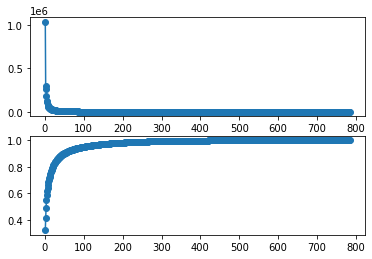

(20,)


In [ ]:
# How do you choose the right number of eigenvalues for my Transformation matrix?
D_ord = np.sort(lambdas)[::-1]
d = D_ord.shape[0]

fig, axs = plt.subplots(2)
axs[0].plot(np.arange(1,d+1),D_ord)
axs[0].scatter(np.arange(1,d+1),D_ord)

y = np.cumsum(D_ord)/np.sum(D_ord)
axs[1].plot(np.arange(1,d+1),y)
axs[1].scatter(np.arange(1,d+1),y)

plt.show()

# How to select the optimal number? Keep 80% of the variance
ratio = 0.8
N = np.where(y < ratio)
print(N[0].shape)